In [1]:
import tensorflow as tf

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)

In [4]:
data_dir = pathlib.Path(data_dir)
print(data_dir)

C:\Users\laure\.keras\datasets\flower_photos


In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3666

In [6]:
DATA_CLASSES = [item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]
print(DATA_CLASSES)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [7]:
import random
from CNNModules import *

IMG_SIZE = 50
training_data , testing_data,  distribution = data_preprocess(data_dir, IMG_SIZE, DATA_CLASSES)
random.shuffle(training_data)


In [8]:
print(len(training_data))
i = 0
for elem in distribution:
    print('Proportion of ' + str(DATA_CLASSES[i]))
    print(elem / image_count)
    i+=1

2935
Proportion of daisy
0.1723949809056192
Proportion of dandelion
0.24440807419530824
Proportion of roses
0.1745771958537916
Proportion of sunflowers
0.190671031096563
Proportion of tulips
0.21794871794871795


This image


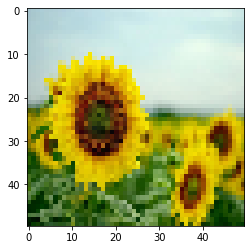

is represented like this to our model 
 
[[[204 194 165]
  [207 200 168]
  [211 202 169]
  ...
  [232 233 207]
  [230 232 203]
  [228 230 201]]

 [[204 195 166]
  [205 199 168]
  [207 202 171]
  ...
  [230 235 207]
  [230 232 206]
  [229 231 202]]

 [[203 197 166]
  [205 200 170]
  [208 203 172]
  ...
  [229 233 202]
  [229 231 201]
  [226 228 199]]

 ...

 [[ 62 120  75]
  [ 66 124  83]
  [ 67 116  78]
  ...
  [ 16  81  37]
  [  4  75  28]
  [ 37  97  55]]

 [[  1  32   1]
  [  0  20   0]
  [  2  15   2]
  ...
  [  1  68  18]
  [  1  71  19]
  [ 15  82  36]]

 [[  1  21   1]
  [  1  57   6]
  [  1  61  16]
  ...
  [  0  71  19]
  [  2  58   5]
  [  1  53   0]]]


In [9]:
#split into image data and labels (X,y)
X , y = restructure_data(training_data)

#take a look at a piece of data
print('This image')

check_image = training_data[0][0]
#try commenting out the line below
#how does it affect the image? how does it affect the training?
check_image = cv2.cvtColor(check_image, cv2.COLOR_BGR2RGB)
plt.imshow(check_image)
plt.show()

print('is represented like this to our model \n ')

print(training_data[0][0])
#print(testing_data[0][0])

In [10]:
X = X/255.0

#magical model building!
model = build_model(X,y,len(DATA_CLASSES))

#note: 
#epochs = number of times it trains
#validation_split = what to take out to test on automatically
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 2054 samples, validate on 881 samples
Epoch 1/3
2054/2054 [==============================] - 44s 21ms/sample - loss: 1.4209 - acc: 0.4060 - val_loss: 1.2010 - val_acc: 0.4699
Epoch 2/3
2054/2054 [==============================] - 42s 21ms/sample - loss: 1.1198 - acc: 0.5365 - val_loss: 1.1189 - val_acc: 0.5630
Epoch 3/3
2054/2054 [==============================] - 44s 21ms/sample - loss: 0.9520 - acc: 0.6324 - val_loss: 1.0549 - val_acc: 0.5948


In [11]:
X_test, y_test = restructure_data(testing_data)
predictions = model.predict(X_test)

error_occurances = []
i = 0

while i < len(predictions):
    
    if not np.argmax(predictions[i]) == y_test[i]:
        error_occurances.append(i)
        
    i+=1
    
print('The model was right ' + str(100*(1-len(error_occurances)/len(predictions))) + '% of the time')
    

The model was right 46.6484268125855% of the time


The model predicted that this image is in the category of tulips and it is in the category of sunflowers


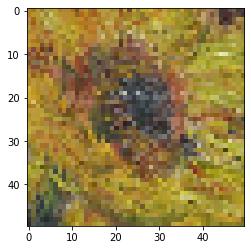

In [12]:
import random
#check a random data point from all of X_test
#check = random.randint(0,len(X_test)-1) 
#or check one of the mrked errors
check = error_occurances[random.randint(0, len(error_occurances)-1)]

print('The model predicted that this image is in the category of ' + DATA_CLASSES[np.argmax(predictions[check])] + 
      ' and it is in the category of ' + DATA_CLASSES[y_test[check]])
display_image(X_test[check])